# **Tarea de técnicas avanzadas**
Nora calle


## **Sección 1: Orquestación de pruebas combinatorias**

Este cuaderno implementa un sistema completo de generación y priorización de casos de prueba utilizando técnicas combinatorias y análisis de riesgo.




**1.1 Preparación del entorno**

In [ ]:
#instalar y cargar allpairspy
!pip install allpairspy
!pip install pylint
!pip install pytest
!pip install mutmut
!pip install pytest-cov
from allpairspy import AllPairs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Sistema de Admision Hospitalaria**

Se implemento un sistema de de pruebas combinatorias para validar reglas de negocio en un proceso de admisión hospitalaria. A partir de un conjunto de parámetros de entrada (tipo de paciente, tipo de servicio, fecha y prioridad),

In [ ]:


# 1. Espacio de parámetros
parametros = {
    "tipo_paciente": ["Adulto", "Niño", "Adulto mayor"],
    "servicio": ["Consulta", "Emergencia"],
    "fecha": ["2025-01-01", "2025-01-15", "2025-01-30", "2025-02-10","2025-02-01"],
    "prioridad": [1, 3]
}

# 2. funcion del Sistema: admisión de pacientes por características
def admitir_paciente(tipo_paciente, servicio, fecha, prioridad):
    # extraer día
    dia = int(fecha.split("-")[2])
    # Emergencia siempre se atiende
    if servicio == "Emergencia":
        return True
    # Niños no se atienden en consulta a fin de mes
    if tipo_paciente == "Niño" and dia == 30:
        return False
    # adultos mayores no se atienden en consulta en quincena
    if tipo_paciente == "Adulto mayor" and dia == 15:
        return False
    # adultos no se atienden en consulta el primero
    if tipo_paciente == "Adulto" and dia == 1:
        return False
    # Prioridad alta se atiende siempre
    if prioridad == 3:
        return True
    return True

# 3. Generación de casos y ejecución del test
nombres = list(parametros.keys())
valores = list(parametros.values())

print(" Parámetros del sistema:")
for key, values in parametros.items():
    print(f"  • {key}: {values}")

print(f"\n Total combinaciones posibles: {np.prod([len(v) for v in parametros.values()])}")



 Parámetros del sistema:
  • tipo_paciente: ['Adulto', 'Niño', 'Adulto mayor']
  • servicio: ['Consulta', 'Emergencia']
  • fecha: ['2025-01-01', '2025-01-15', '2025-01-30', '2025-02-10', '2025-02-01']
  • prioridad: [1, 3]

 Total combinaciones posibles: 60


**1.2 Generación de casos de prueba automáticos**
el sistema utiliza la técnica pairwise mediante la librería `allpairspy` para generar combinaciones representativas de casos de prueba y ejecutarlas automáticamente sobre la función de admisión, permitiendo detectar inconsistencias o errores en la lógica de decisión con un número reducido pero eficaz de pruebas.

La ejecución de los tests genera automáticamente un listado de 'Pruebas de admisión hospitalaria', donde cada fila corresponde a una combinación de parámetros obtenida. Para cada caso se muestra el tipo de paciente, el servicio solicitado, la fecha de atención y la prioridad, junto con el resultado de la función (`Admitido: True/False`) , lo que permite visualizar de forma clara qué escenarios cumplen las reglas de admisión y cuáles son rechazados, facilitando la revisión de la lógica y la detección de posibles comportamientos inesperados en el sistema.

- Librería allpairspy: https://github.com/pairwise-testing/python-allpairspy
- Documentación de pairwise testing: https://www.testrail.com/blog/pairwise-testing/


In [ ]:
# Generación de casos y ejecución del test usando AllPairs
nombres = list(parametros.keys())
valores = list(parametros.values())

print("PRUEBAS DE ADMISIÓN HOSPITALARIA:")

# Almacenar resultados para análisis posterior
resultados = []
casos_admitidos = 0
casos_rechazados = 0

for i, combinacion in enumerate(AllPairs(valores), start=1):
    caso = dict(zip(nombres, combinacion))
    resultado = admitir_paciente(**caso)

    # Guardar resultado
    caso_resultado = {
        'caso_id': i,
        'tipo_paciente': caso['tipo_paciente'],
        'servicio': caso['servicio'],
        'fecha': caso['fecha'],
        'prioridad': caso['prioridad'],
        'admitido': resultado,
        'dia': int(caso['fecha'].split("-")[2])
    }
    resultados.append(caso_resultado)

    # Contar admitidos vs rechazados
    if resultado:
        casos_admitidos += 1
        estado = "ADMITIDO"
    else:
        casos_rechazados += 1
        estado = "RECHAZADO"

    print(f"Caso {i:2d}: {caso} -> {estado}")

print(f"• Total casos evaluados: {len(resultados)}")
print(f"• Casos admitidos: {casos_admitidos}")
print(f"• Casos rechazados: {casos_rechazados}")
print(f"• Tasa de admisión: {casos_admitidos/len(resultados)*100:.1f}%")

PRUEBAS DE ADMISIÓN HOSPITALARIA:
Caso  1: {'tipo_paciente': 'Adulto', 'servicio': 'Consulta', 'fecha': '2025-01-01', 'prioridad': 1} -> RECHAZADO
Caso  2: {'tipo_paciente': 'Niño', 'servicio': 'Emergencia', 'fecha': '2025-01-15', 'prioridad': 1} -> ADMITIDO
Caso  3: {'tipo_paciente': 'Adulto mayor', 'servicio': 'Emergencia', 'fecha': '2025-01-30', 'prioridad': 3} -> ADMITIDO
Caso  4: {'tipo_paciente': 'Adulto mayor', 'servicio': 'Consulta', 'fecha': '2025-02-10', 'prioridad': 1} -> ADMITIDO
Caso  5: {'tipo_paciente': 'Niño', 'servicio': 'Consulta', 'fecha': '2025-02-01', 'prioridad': 3} -> ADMITIDO
Caso  6: {'tipo_paciente': 'Adulto', 'servicio': 'Emergencia', 'fecha': '2025-02-01', 'prioridad': 1} -> ADMITIDO
Caso  7: {'tipo_paciente': 'Adulto', 'servicio': 'Emergencia', 'fecha': '2025-02-10', 'prioridad': 3} -> ADMITIDO
Caso  8: {'tipo_paciente': 'Niño', 'servicio': 'Consulta', 'fecha': '2025-01-30', 'prioridad': 1} -> RECHAZADO
Caso  9: {'tipo_paciente': 'Adulto mayor', 'servicio':

**1.3 Priorización de casos por riesgo**
Se implementa un caso de riesgo, donde se define un diccionario con cinco funcionalidades clave, cada una con métricas de impacto (1-3) y probabilidad (1-3), junto con una descripción de su criticidad. Luego implementa una función calcular_riesgo() que multiplica impacto por probabilidad para obtener un puntaje numérico. Finalmente, itera sobre cada funcionalidad calculando su riesgo y muestra los resultados individuales antes de ordenarlos de mayor a menor riesgo y clasificarlos en tres niveles: ALTO (riesgo ≥ 9), MEDIO (riesgo ≥ 6) y BAJO (riesgo < 6).

La salida muestra una priorización clara de las funcionalidades según su nivel de riesgo. Lista cada funcionalidad con su puntaje de riesgo calculado y descripción. Luego presenta una tabla ordenada donde Atencion_Emergencia y Atencion_PrioridadAlta encabezan con riesgo 9 (ALTO), seguidas por Restriccion_AdultoMayor con riesgo 6 (MEDIO) y finalmente Restriccion_Niños y Restriccion_Adultos con riesgos 4 y 2 respectivamente (BAJO).

- guia  https://testlio.com/blog/test-case-prioritization-in-software-testing/.

In [ ]:
# Definir funcionalidades/vulnerabilidades con sus métricas de riesgo
funcionalidades = {
    "Atencion_Emergencia": {
        "impacto": 3,
        "probabilidad": 3,
        "descripcion": "Paciente grave, debe ser atendido sí o sí"
    },
    "Restriccion_Niños": {
        "impacto": 2,
        "probabilidad": 2,
        "descripcion": "Afecta agenda pero no es crítico. Solo población niños"
    },
    "Restriccion_AdultoMayor": {
        "impacto": 3,
        "probabilidad": 2,
        "descripcion": "Población vulnerable, si falla es crítico"
    },
    "Restriccion_Adultos": {
        "impacto": 2,
        "probabilidad": 1,
        "descripcion": "Impacta agenda pero menos crítico por no ser vulnerable"
    },
    "Atencion_PrioridadAlta": {
        "impacto": 3,
        "probabilidad": 3,
        "descripcion": "Prioridad alta es igual a emergencia"
    }
}

# Función para calcular riesgo
def calcular_riesgo(funcionalidad):
    return funcionalidad["impacto"] * funcionalidad["probabilidad"]

# Calcular riesgos y mostrar resultados
riesgos = {}
for nombre, func in funcionalidades.items():
    riesgo = calcular_riesgo(func)
    riesgos[nombre] = riesgo
    print(f"• {nombre}: Riesgo = {riesgo}")
    print(f"  └─ {func['descripcion']}")

# Ordenar por riesgo descendente
for i, (func, riesgo) in enumerate(sorted(riesgos.items(), key=lambda x: x[1], reverse=True), 1):
    nivel = " ALTO" if riesgo >= 9 else " MEDIO" if riesgo >= 6 else " BAJO"
    print(f"{i}. {func}: Riesgo = {riesgo} ({nivel})")

• Atencion_Emergencia: Riesgo = 9
  └─ Paciente grave, debe ser atendido sí o sí
• Restriccion_Niños: Riesgo = 4
  └─ Afecta agenda pero no es crítico. Solo población niños
• Restriccion_AdultoMayor: Riesgo = 6
  └─ Población vulnerable, si falla es crítico
• Restriccion_Adultos: Riesgo = 2
  └─ Impacta agenda pero menos crítico por no ser vulnerable
• Atencion_PrioridadAlta: Riesgo = 9
  └─ Prioridad alta es igual a emergencia
1. Atencion_Emergencia: Riesgo = 9 ( ALTO)
2. Atencion_PrioridadAlta: Riesgo = 9 ( ALTO)
3. Restriccion_AdultoMayor: Riesgo = 6 ( MEDIO)
4. Restriccion_Niños: Riesgo = 4 ( BAJO)
5. Restriccion_Adultos: Riesgo = 2 ( BAJO)


**1.4 Modelo de predicción**

Este modelo de predicción de defectos de software utiliza regresión lineal supervisada para estimar el número esperado de errores en un módulo de software basándose en su tamaño medido en líneas de código. Este enfoque permite priorizar esfuerzos de prueba al identificar qué componentes son más propensos a contener defectos. El modelo aprende de datos históricos simulando ejecuciones previas, donde cada línea adicional de código incrementa la probabilidad de errores en aproximadamente 3%, siguiendo principios establecidos en la literatura académica sobre predicción de defecto

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



* Aumento promedio de errores por cada línea de código: 0.029119945734601815
* Con 0 líneas de código el modelo predice: -0.4660020765230719 errores
* Ajuste R2 del modelo: 0.9413545810296687


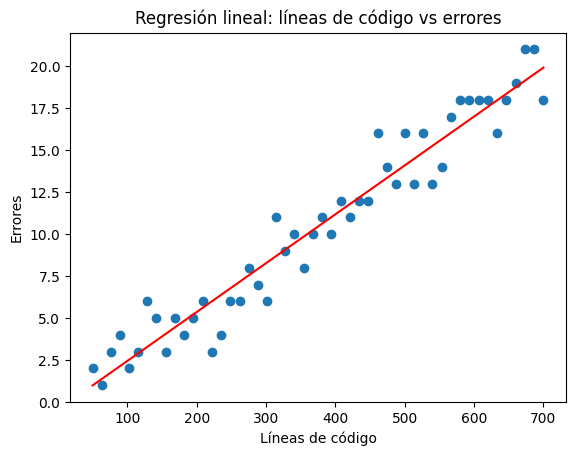

In [ ]:
#para reproducir mismos resultados
np.random.seed(42)
#eje x: lineas de código (inicia=50, termina=700, tamaño=50 datos). Entregar como enteros
lineas = np.linspace(50, 700, 50).astype(int)
#eje y: por cada línea de codigo aumenta un 3% probabilidad de error
errores = 0.03 * lineas
#añadir ruido al eje (media=0 para no sesgar, sd=1.5 para moderada dispersión y tamaño=50 datos aleatorios). Entregar como enteros
errores = (errores + np.random.normal(0, 1.5, size=50)).astype(int)
#crear modelo
X = lineas.reshape(-1, 1)
Y = errores
modelo = LinearRegression()
modelo.fit(X, Y)
#revisar pendiente modelo
print("* Aumento promedio de errores por cada línea de código: " + str(modelo.coef_[0]))
#revisar intercepto
print("* Con 0 líneas de código el modelo predice: " + str(modelo.intercept_) + " errores")
#revisar ajuste R2
print("* Ajuste R2 del modelo: " + str(modelo.score(X, Y)))
#generar predicción
lineas_pred = np.linspace(lineas.min(), lineas.max(), 100).reshape(-1, 1)
errores_pred = modelo.predict(lineas_pred)
# Gráfico
plt.figure()
plt.scatter(lineas, errores)
plt.plot(lineas_pred, errores_pred, color="red")
plt.xlabel("Líneas de código")
plt.ylabel("Errores")
plt.title("Regresión lineal: líneas de código vs errores")
plt.show()

## **Sección 2: Pipeline testing integral**

**2.1 Análisis estático pylint**
Pylint es un analizador estático de código Python que examina la fuente sin ejecutarlo, verificando múltiples aspectos de calidad como errores definitivos, advertencias de posibles problemas, violaciones de convenciones de estilo, sugerencias de refactorización y problemas fatales que impiden el análisis. La herramienta agrupa sus mensajes en categorías como, fatal, error, warning, refactor, convention e info. Esta evaluación permite detectar desde simples errores de sintaxis hasta complejos code smells, proporcionando una visión completa de la salud del código antes de su ejecución.
- documentacion https://pypi.org/project/pylint/

In [ ]:
#código de funcion admitir_paciente (corregida) para evaluar en pylint
admision_fun = '''
"""Funcion de admision hospitalaria"""
def admitir_paciente(tipo_paciente, servicio, fecha, prioridad):
    """Determina si un paciente es admitido según reglas básicas"""
    dia = int(fecha.split("-")[2])
    if servicio == "Emergencia":
        return True
    if tipo_paciente == "Nino" and dia == 30:
        return False
    if tipo_paciente == "Adulto mayor" and dia == 15:
        return False
    if tipo_paciente == "Adulto" and dia == 1:
        return False
    if prioridad == 3:
        return True
    return True
'''

#grabar script de función
with open("admision_fun.py", "w") as f:
    f.write(admision_fun)

#ejecutar evaluación pylint
!pylint admision_fun.py


--------------------------------------------------------------------
Your code has been rated at 10.00/10 (previous run: 10.00/10, +0.00)



**2.2 Pruebas unitarias, de mutación y de cobertura**

Este código define cinco funciones de prueba que verifican las reglas de negocio críticas del sistema: test_emergencia_siempre_atendida confirma que todas las emergencias son atendidas sin importar otros parámetros; test_nino_fin_mes_no_atendido valida que los niños no reciben consultas el día 30 del mes; test_adulto_mayor_quincena_no_atendido asegura que los adultos mayores no se atienden el día 15; test_adulto_primer_dia_no_atendido verifica que los adultos no son atendidos el primer día del mes; y test_prioridad_alta_siempre_atendida garantiza que los pacientes con prioridad alta (nivel 3) siempre son admitidos. Cada prueba utiliza la función admitir_paciente con diferentes combinaciones de parámetros y emplea assertions para validar que el resultado booleano coincida con las reglas de negocio esperadas.

La salida muestra "collected 5 items", indicando que el framework descubrió exitosamente las cinco funciones de prueba definidas en el archivo, "5 passed in 0.03s" confirma que todas las pruebas se ejecutaron correctamente en 0.03 segundos, con cero fallos. Esta ejecución exitosa demuestra que la función admitir_paciente implementa correctamente todas las reglas de negocio especificadas y que las pruebas cubren adecuadamente los casos críticos del sistema de admisión hospitalaria.
- Documentacion https://docs.pytest.org/en/stable/

In [ ]:
#código para pruebas unitarias
test_admision = '''
"""Pruebas unitarias del sistema de admisión hospitalaria"""
from admision_fun import admitir_paciente
def test_emergencia_siempre_atendida():
    """Emergencias deben ser atendidas siempre."""
    assert admitir_paciente("Adulto", "Emergencia", "2025-01-10", 1) is True
def test_nino_fin_mes_no_atendido():
    """Niños no se atienden en consulta a fin de mes."""
    assert admitir_paciente("Nino", "Consulta", "2025-01-30", 1) is False
def test_adulto_mayor_quincena_no_atendido():
    """Adultos mayores no se atienden en quincena."""
    assert admitir_paciente("Adulto mayor", "Consulta", "2025-01-15", 1) is False
def test_adulto_primer_dia_no_atendido():
    """Adultos no se atienden el primer día del mes."""
    assert admitir_paciente("Adulto", "Consulta", "2025-01-01", 1) is False
def test_prioridad_alta_siempre_atendida():
    """Pacientes con prioridad alta siempre son atendidos."""
    assert admitir_paciente("Adulto", "Consulta", "2025-01-10", 3) is True
'''
#grabar script de tests
with open("test_admision.py", "w") as f:
    f.write(test_admision)

#ejecutar pytest
!pytest test_admision.py

============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0
rootdir: /content
plugins: cov-7.0.0, langsmith-0.4.59, typeguard-4.4.4, anyio-4.12.0
collected 5 items                                                              

test_admision.py .....                                                   [100%]

============================== 5 passed in 0.02s ===============================


**Pruebas de mutación**

Es una técnica de testing que evalúa la calidad del suite de pruebas introduciendo pequeños cambios (mutantes) en el código fuente y verificando si las pruebas logran detectar estos errores artificiales. Tambien genera mutantes aplicando operadores de mutación como reemplazos aritméticos, negaciones lógicas y cambios en operadores de comparación. El objetivo es que cada mutante sea eliminado (killed) por las pruebas, lo que demuestra que el suite puede detectar errores sutiles. Los mutantes que sobreviven indican posibles brechas en la cobertura de pruebas o código que no está siendo adecuadamente validado. Esta técnica va más allá de la cobertura de código tradicional, ya que prueba la efectividad real de las pruebas para detectar bugs.

La salida de Mutmut utiliza una notación con emojis para indicar el estado de cada mutante procesado. En el resultado "38/38 significa, mutantes eliminados, mutantes sobrevivientes, mutantes que causaron timeout, mutantes sospechosos y mutantes silenciados. Es decir 30 mutantes eliminados y 8 sobrevivientes, el mutation score es de 78.9%, indicando buena calidad de las pruebas pero con oportunidades de mejora.

https://about.codecov.io/blog/getting-started-with-mutation-testing-in-python-with-mutmut/





In [ ]:
#se crea primero file setup.cfg para especificar el codigo a evaluar con mutmut
%%writefile setup.cfg
[mutmut]
paths_to_mutate = admision_fun.py

Writing setup.cfg


In [ ]:
#ejecución de las pruebas de mutación con mutmut
!mutmut run

⠹ Generating mutants
    done in 100ms
⠋ Running stats
    done
⠋ Running clean tests
    done
⠦ Running forced fail test
    done
Running mutation testing
⠴ 38/38  🎉 30 🫥 0  ⏰ 0  🤔 0  🙁 8  🔇 0
9.61 mutations/second


**Pruebas de Cobertura**

El comando !pytest --cov=admision_fun --ignore=mutants utiliza el plugin pytest-cov para medir la cobertura de código del módulo admision_fun.py mientras ejecuta las pruebas unitarias. Este comando integra la herramienta coverage.py con pytest, proporcionando un análisis automático de qué líneas del código fuente son ejecutadas durante las pruebas. La opción --cov=admision_fun especifica el módulo objetivo para el análisis de cobertura, mientras que --ignore=mutants excluye el directorio de mutantes para evitar contaminar las métricas con código modificado artificialmente.

La salida muestra que pytest recolectó exitosamente 5 pruebas, el reporte de cobertura revela que el módulo admision_fun.py contiene 13 sentencias ejecutables, de las cuales 1 no fue ejecutada, resultando en una cobertura del 92% (Cover). Esta métrica indica que el 92% del código fuente fue ejercitado por las pruebas unitarias, dejando únicamente 1 línea sin cubrir. La línea no cubierta podría representar un caso límite no contemplado, código inalcanzable, o un manejo de errores específico que requiere una prueba adicional.

- Documentacion https://coverage.readthedocs.io/en/7.13.0/




In [ ]:
#pruebas de cobertura
!pytest --cov=admision_fun --ignore=mutants

============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0
rootdir: /content
plugins: cov-7.0.0, langsmith-0.4.59, typeguard-4.4.4, anyio-4.12.0
collected 5 items                                                              

test_admision.py .....                                                   [100%]

================================ tests coverage ================================
_______________ coverage: platform linux, python 3.12.12-final-0 _______________

Name              Stmts   Miss  Cover
-------------------------------------
admision_fun.py      13      1    92%
-------------------------------------
TOTAL                13      1    92%
============================== 5 passed in 0.05s ===============================


**2.3 Pruebas combinatorias**

El código implementa pruebas combinatorias utilizando la biblioteca allpairspy con el algoritmo AllPairs, una técnica de testing que reduce drásticamente el número de casos de prueba mientras mantiene cobertura de todas las interacciones por pares entre parámetros. El espacio de parámetros define cuatro factores críticos del sistema de admisión: tipo de paciente (3 valores), servicio (2 valores), fecha (3 valores) y prioridad (2 valores), lo que resultaría en 36 combinaciones posibles (3×2×3×2). Sin embargo, AllPairs reduce esto a solo 10 casos de prueba cubriendo todas las interacciones por pares. La función generar_casos() utiliza un enfoque elegante ya que extrae los nombres y valores de los parámetros, luego usa dict(zip(nombres, combinacion)) para crear diccionarios de prueba que pytest puede desempaquetar directamente con caso.

La salida muestra la ejecución exitosa de las 10 pruebas combinatorias generadas por AllPairs. El indicador confirma que pytest descubrió correctamente los 10 casos de prueba únicos generados por el algoritmo pairwise, lo que demuestra la eficiencia del enfoque combinatorio en solo 0.03 segundos se validó la robustez del sistema contra un conjunto representativo de interacciones, reduciendo significativamente el tiempo de prueba comparado con las 36 combinaciones posibles.
- Documentacion https://docs.pytest.org/en/stable/how-to/output.html


In [ ]:
#derivar codigo
test_combinatorio = """
import pytest
from allpairspy import AllPairs
from admision_fun import admitir_paciente
# Espacio de parámetros
parametros = {
    "tipo_paciente": ["Adulto", "Nino", "Adulto mayor"],
    "servicio": ["Consulta", "Emergencia"],
    "fecha": ["2025-01-01", "2025-01-15", "2025-01-30"],
    "prioridad": [1, 3],
}
def generar_casos():
    nombres = list(parametros.keys())
    valores = list(parametros.values())
    return [
        dict(zip(nombres, combinacion))
        for combinacion in AllPairs(valores)
    ]
@pytest.mark.parametrize("caso", generar_casos())
def test_admision_combinatoria(caso):
    resultado = admitir_paciente(**caso)
    assert isinstance(resultado, bool)
"""

with open("test_combinatorio.py", "w") as f:
    f.write(test_combinatorio)

#ejecutar las pruebas combinatorias
!pytest test_combinatorio.py

============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0
rootdir: /content
plugins: cov-7.0.0, langsmith-0.4.59, typeguard-4.4.4, anyio-4.12.0
collected 10 items                                                             

test_combinatorio.py ..........                                          [100%]

============================== 10 passed in 0.03s ==============================


**2.4 Automatización sin código**

**2.5 Modelo predictivo de confiabilidad**

El código implementa un modelo predictivo de confiabilidad tipo Frestimate, una técnica de software reliability growth model que estima la madurez del sistema basándose en la curva de detección de errores. Tambien se implemento NumPy para manejar los datos de iteraciones y errores acumulados detectados, aplicando un enfoque simple pero efectivo ya que estima el total de errores como el máximo detectado más 2 unidades, luego calcula los errores restantes y la confiabilidad como la proporción de errores detectados respecto al total estimado.

La salida muestra métricas clave sobre la madurez del software, donde se estiman 16 errores totales en el sistema, de los cuales ya se han detectado 14 a través de 7 ciclos de prueba, dejando únicamente 2 errores restantes por descubrir. La confiabilidad estimada de 0.88 indica que el software tiene una alta probabilidad de operar sin fallos, basándose en la evidencia empírica de que el 87.5% de los errores potenciales ya han sido identificados y corregidos. La estabilización de la curva de detección,los errores detectados se mantienen en 14 entre las iteraciones 6 y 7 sugiere que el sistema está alcanzando su punto de saturación, un indicador típico en modelos SMERFS y Frestimate que sugiere que continuar las pruebas produciría rendimientos decrecientes en términos de nuevos errores descubiertos.

https://www.ijcsit.com/docs/Volume%205/vol5issue04/ijcsit20140504161.pdf

Errores totales estimados: 16
Errores detectados: 14
Errores restantes estimados: 2
Confiabilidad estimada: 0.88


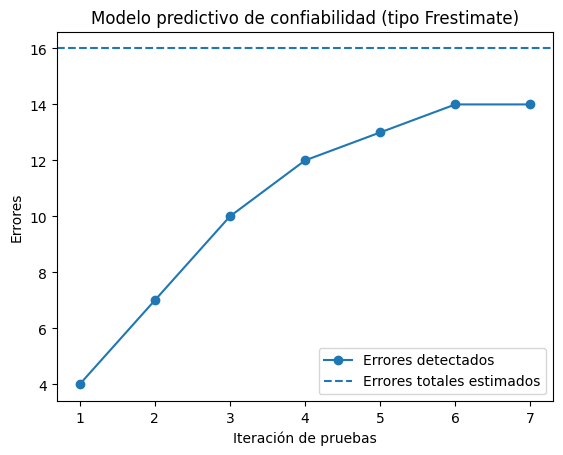

In [ ]:
#Iteraciones de prueba (ciclos de testing)
iteraciones = np.array([1, 2, 3, 4, 5, 6, 7])
#Errores acumulados detectados hasta cada iteración
errores_detectados = np.array([4, 7, 10, 12, 13, 14, 14])
#Suposición: el total de errores tiende a estabilizarse
errores_totales_estimados = errores_detectados.max() + 2
#cuantos errores quedan
errores_restantes = errores_totales_estimados - errores_detectados
#que porcentaje de errores ya se detectaron
confiabilidad = errores_detectados / errores_totales_estimados
print("Errores totales estimados:", errores_totales_estimados)
print("Errores detectados:", errores_detectados[-1])
print("Errores restantes estimados:", errores_restantes[-1])
print("Confiabilidad estimada:", round(confiabilidad[-1], 2))
#obtener grafico
plt.figure()
plt.plot(iteraciones, errores_detectados, marker="o", label="Errores detectados")
plt.axhline(errores_totales_estimados, linestyle="--", label="Errores totales estimados")
plt.xlabel("Iteración de pruebas")
plt.ylabel("Errores")
plt.title("Modelo predictivo de confiabilidad (tipo Frestimate)")
plt.legend()
plt.show()